In [4]:
from monkey_training.load_best_model import get_best_brcnn_model, get_best_energy_model, get_monkey_subjects_info
from nnvision.utility.measures import get_avg_correlations
import matplotlib.pyplot as plt
import numpy as np
from create_mei import create_mei_of_n_neurons
import matplotlib.pyplot as plt
import numpy as np
import h5py
# from check_monkey_model.classical_exps_config import radii
import seaborn as sns
import pandas as pd

In [10]:
model0, dataloaders0 = get_best_brcnn_model(subject=0, return_dataloaders=True)
model1, dataloaders1 = get_best_brcnn_model(subject=1, return_dataloaders=True)
model_both, _ = get_best_brcnn_model(subject='both', return_dataloaders=True)
corr_0_brcnn = get_avg_correlations(model0, dataloaders0['test'], as_dict=False, per_neuron=False)
corr_1_brcnn = get_avg_correlations(model1, dataloaders1['test'], as_dict=False, per_neuron=False)

Loading images ...


/home/baroni/miniconda3/envs/recnn_env/lib/python3.9/site-packages/skimage/_shared/utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)
Files Processing: 100%|██████████| 15/15 [01:31<00:00,  6.10s/it]
/home/baroni/recnn/src/neuralpredictors/neuralpredictors/layers/readouts/base.py:74: UserWarning: Use of 'gamma_readout' is deprecated. Use 'feature_reg_weight' instead. If 'feature_reg_weight' is defined, 'gamma_readout' is ignored
  warnings.warn(
/home/baroni/recnn/readout.py:324: UserWarning: sigma is sampled from uniform distribution, instead of a fixed value. Consider setting fixed_sigma to True
  warnings.warn(


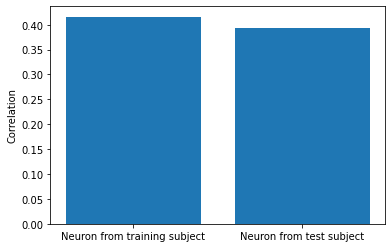

In [9]:
plt.figure(figsize=(6,4))
plt.bar(['Neuron from training subject', 'Neuron from test subject'], [corr_0_brcnn, corr_1_brcnn])
plt.ylabel('Correlation')
plt.show()


Loading images ...


/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


Loading images ...


Files Processing: 100%|██████████| 15/15 [00:04<00:00,  3.14it/s]


n_neurons_dict {'all_sessions': 238}
in_shapes_dict {'all_sessions': torch.Size([4, 1, 46, 46])}
input_channels [1]
Loading images ...
Loading images ...


Files Processing: 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]


n_neurons_dict {'all_sessions': 220}
in_shapes_dict {'all_sessions': torch.Size([4, 1, 46, 46])}
input_channels [1]
Loading images ...
Loading images ...


Files Processing: 100%|██████████| 32/32 [00:09<00:00,  3.24it/s]


n_neurons_dict {'all_sessions': 458}
in_shapes_dict {'all_sessions': torch.Size([4, 1, 46, 46])}
input_channels [1]


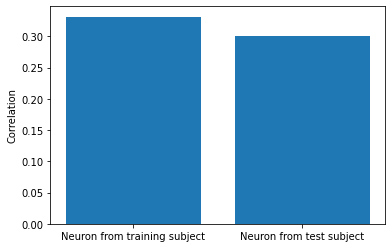

In [16]:
energy_model0, dataloaders0 = get_best_energy_model(subject=0, return_dataloaders=True)
energy_model1, dataloaders1 = get_best_energy_model(subject=1, return_dataloaders=True)
energy_model_both, _ = get_best_energy_model(subject='both', return_dataloaders=True)
corr_0_energy = get_avg_correlations(energy_model0, dataloaders0['test'], as_dict=False, per_neuron=False)
corr_1_energy = get_avg_correlations(energy_model1, dataloaders1['test'], as_dict=False, per_neuron=False)

plt.figure(figsize=(6,4))
plt.bar(['Neuron from training subject', 'Neuron from test subject'], [corr_0_energy, corr_1_energy])
plt.ylabel('Correlation')
plt.show()


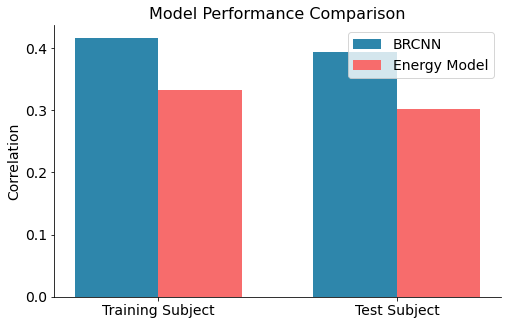

In [21]:
plt.figure(figsize=(8,5))
width = 0.35
x = np.arange(2)

plt.bar(x - width/2, [corr_0_brcnn, corr_1_brcnn], width, label='BRCNN', color='#2E86AB')
plt.bar(x + width/2, [corr_0_energy, corr_1_energy], width, label='Energy Model', color='#F76C6C')

plt.xticks(x, ['Training Subject', 'Test Subject'], fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.legend(fontsize=14)
plt.title('Model Performance Comparison', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Reduce number of y-axis ticks
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))

plt.show()


## get MEIS

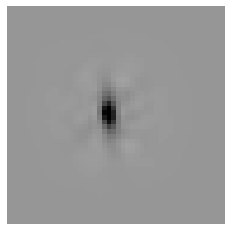

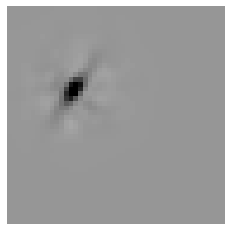

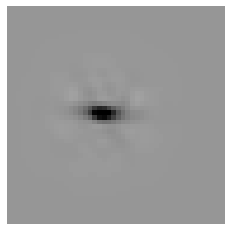

In [25]:
# mei_config= {'std':0.15, 'seed':42, 'img_res': [46,46], 'pixel_min': -1.7876, 'pixel_max': 2.1919, 'gaussianblur':1., 'device':None, 'step_size':10, 'num_steps':1000}
# meis, mei_acts = create_mei_of_n_neurons(model_both, [0, 72, 79], **mei_config)

# for i in range(3):
#     plt.imshow(meis[i], cmap='Greys_r', vmin = -1.7876, vmax = 2.1919)
#     plt.axis('off')
#     plt.title(i)
#     plt.show()

# # meis 
# meis = np.save( '/project/monkey_training/meis.npy', np.stack(meis))

brcnn_meis = np.load('/project/monkey_training/meis.npy')
for i in range(3):
    plt.imshow(brcnn_meis[i], cmap='Greys_r', vmin = -1.7876, vmax = 2.1919)
    plt.axis('off')
    plt.show()


Final f(x) = 0.46
Final f(x) = 0.46
Final f(x) = 0.46


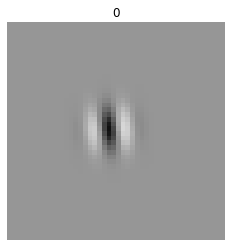

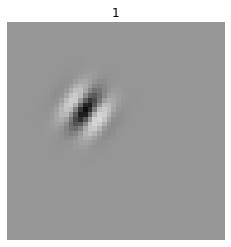

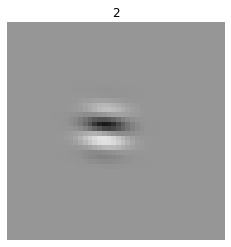

In [29]:
v_min = -1.7876
v_max = 2.1919
v_half = (v_max - v_min) / 2
mei_config= {'std':0.15, 'seed':42, 'img_res': [46,46], 'pixel_min': -v_half, 'pixel_max': v_half, 'gaussianblur':1., 'device':None, 'step_size':100, 'num_steps':1000}
meis_energy, mei_acts_energy = create_mei_of_n_neurons(energy_model_both, [0, 72, 79], **mei_config)
for i in range(3):
    plt.imshow(meis_energy[i], cmap='Greys_r', vmin = -v_half, vmax = v_half)
    plt.axis('off')
    plt.show()

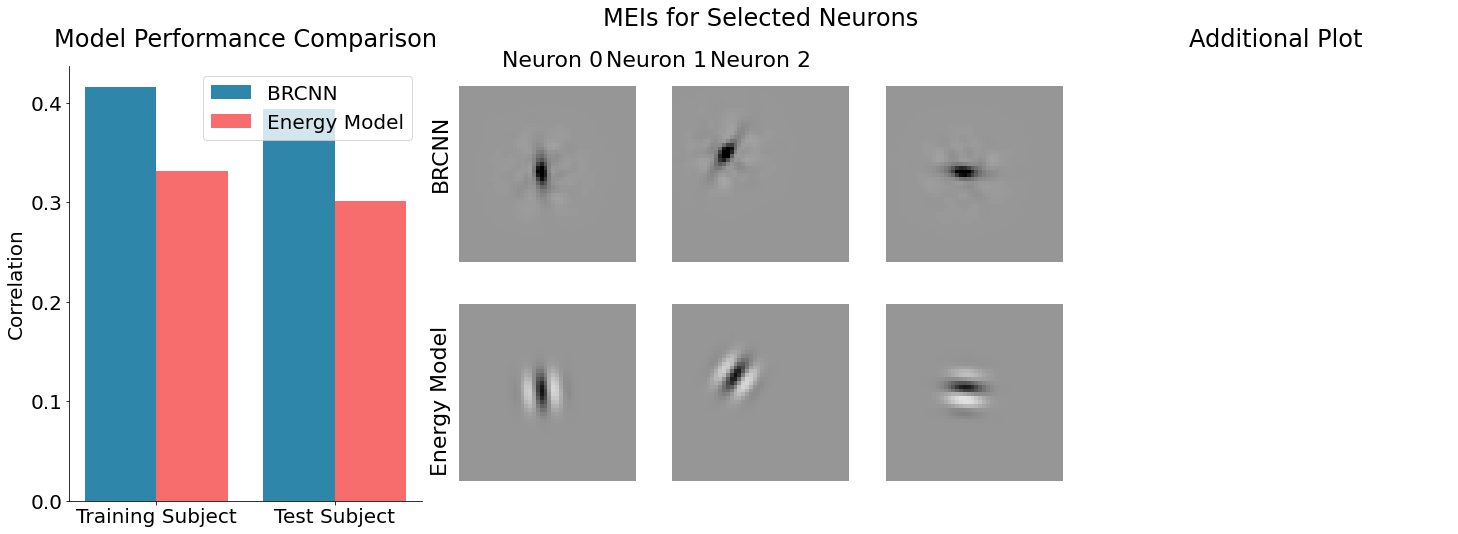

In [84]:
#### model performanc comparison plot
# Create a figure with 2 rows and 5 columns, with the first and last columns spanning both rows
fig = plt.figure(figsize=(24, 8))  # Increased figure size

# Create a grid layout with wider left column and more space for labels
gs = plt.GridSpec(2, 5, figure=fig, width_ratios=[2, 1, 1, 1, 2], left=0.1, right=0.9, 
                 wspace=0.05, hspace=0.01)  # Reduced wspace for tighter spacing

# Add minimal spacing after first column
gs.update(wspace=0.15, hspace=0.01)  # Reduced wspace
gs.get_grid_positions(fig)[1][0] += 0.02  # Reduced shift

# Create the left plot spanning both rows
ax_left = fig.add_subplot(gs[:, 0])  # Spans both rows in first column
width = 0.4
x = np.arange(2)

ax_left.bar(x - width/2, [corr_0_brcnn, corr_1_brcnn], width, label='BRCNN', color='#2E86AB')
ax_left.bar(x + width/2, [corr_0_energy, corr_1_energy], width, label='Energy Model', color='#F76C6C')

ax_left.set_xticks(x)
ax_left.set_xticklabels(['Training Subject', 'Test Subject'], fontsize=20)
ax_left.set_ylabel('Correlation', fontsize=20)
ax_left.legend(fontsize=20)
ax_left.set_title('Model Performance Comparison', fontsize=24, pad=20)
ax_left.tick_params(axis='both', which='major', labelsize=20)

# Remove top and right spines
ax_left.spines['top'].set_visible(False)
ax_left.spines['right'].set_visible(False)

# Reduce number of y-axis ticks
ax_left.yaxis.set_major_locator(plt.MaxNLocator(5))

# Add column titles for MEIs with adjusted position and larger font
plt.figtext(0.5, 0.95, 'MEIs for Selected Neurons', fontsize=24, ha='center')
for i in range(3):
    plt.figtext(0.38 + i*0.06, 0.88, f'Neuron {i}', fontsize=22, ha='center')  # Further reduced spacing between titles

# Create the MEI plots in the middle 3 columns
for i in range(3):
    # Bottom row MEIs (Energy model)
    ax = fig.add_subplot(gs[1, i+1])
    if i == 0:  # Add row title for Energy model
        plt.figtext(0.315, 0.30, 'Energy Model', fontsize=22, rotation=90, va='center', ha='center')
    ax.imshow(meis_energy[i], cmap='Greys_r', vmin=-v_half, vmax=v_half)
    ax.axis('off')
    
    # Top row MEIs (BRCNN)
    ax = fig.add_subplot(gs[0, i+1])
    if i == 0:  # Add row title for BRCNN
        plt.figtext(0.315, 0.73, 'BRCNN', fontsize=22, rotation=90, va='center', ha='center')
    ax.imshow(brcnn_meis[i], cmap='Greys_r', vmin=-1.7876, vmax=2.1919)
    ax.axis('off')

# Create the right plot spanning both rows
ax_right = fig.add_subplot(gs[:, -1])  # Spans both rows in last column
ax_right.set_title('Additional Plot', fontsize=24, pad=20)
ax_right.axis('off')  # Placeholder - add additional plot here

plt.show()


# get size tuning curves

Dataset 'neuron_1' not found in 'size_tuning/curves'.
Dataset 'neuron_2' not found in 'size_tuning/curves'.
Dataset 'neuron_3' not found in 'size_tuning/curves'.
Dataset 'neuron_4' not found in 'size_tuning/curves'.
Dataset 'neuron_5' not found in 'size_tuning/curves'.
Dataset 'neuron_6' not found in 'size_tuning/curves'.
Dataset 'neuron_7' not found in 'size_tuning/curves'.
Dataset 'neuron_8' not found in 'size_tuning/curves'.
Dataset 'neuron_9' not found in 'size_tuning/curves'.
Dataset 'neuron_10' not found in 'size_tuning/curves'.
Dataset 'neuron_11' not found in 'size_tuning/curves'.
Dataset 'neuron_12' not found in 'size_tuning/curves'.
Dataset 'neuron_13' not found in 'size_tuning/curves'.
Dataset 'neuron_14' not found in 'size_tuning/curves'.
Dataset 'neuron_15' not found in 'size_tuning/curves'.
Dataset 'neuron_16' not found in 'size_tuning/curves'.
Dataset 'neuron_17' not found in 'size_tuning/curves'.
Dataset 'neuron_18' not found in 'size_tuning/curves'.
Dataset 'neuron_19'

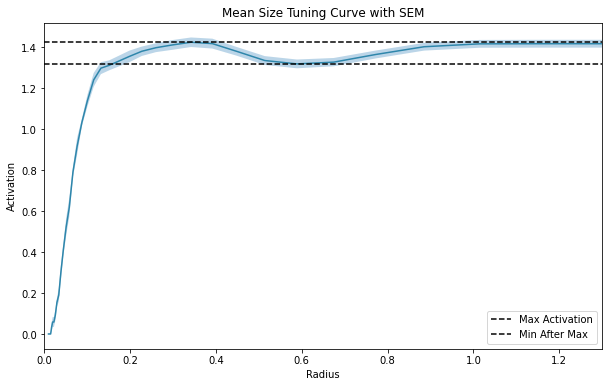

In [93]:
# Path to your HDF5 file
file_path = '/project/check_monkey_model/results_convnext_model.h5'

# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as h5file:
    # Check if the 'size_tuning/curves' group exists
    if 'size_tuning/curves' in h5file:
        group = h5file['size_tuning/curves']
        
        # Store data for all neurons
        all_data = []
        
        # Iterate over neurons
        for neuron_id in range(0,458):
            dataset_name = f'neuron_{neuron_id}'
            
            if dataset_name in group:
                dataset = group[dataset_name]
                # Extract the first row
                data = dataset[0, :]
                all_data.append(data)
            else:
                print(f"Dataset '{dataset_name}' not found in 'size_tuning/curves'.")
        
        # Convert to numpy array
        all_data = np.array(all_data)
        
        # Calculate mean and standard error
        mean_data = np.mean(all_data, axis=0)
        sem_data = np.std(all_data, axis=0) / np.sqrt(len(all_data))
        
        # Store mean and SEM in variables for later use
        size_tuning_mean = mean_data
        size_tuning_sem = sem_data
        
        # Find max value and index
        max_idx = np.argmax(mean_data)
        max_val = mean_data[max_idx]
        
        # Find minimum value after maximum
        min_after_max = np.min(mean_data[max_idx:])
        
        # Plot mean with shaded error using seaborn
        plt.figure(figsize=(10,6))
        sns.lineplot(x=radii, y=mean_data, color='#2E86AB')  # Rich blue for main line
        plt.fill_between(radii, mean_data-sem_data, mean_data+sem_data, alpha=0.3)  # Light blue for shading
        plt.hlines(y=max_val, xmin=0, xmax=1.3, color='black', linestyle='--', label='Max Activation')  # Dark navy
        plt.hlines(y=min_after_max, xmin=0, xmax=1.3, color='black', linestyle='--', label='Min After Max')  # Coral red
        plt.xlabel('Radius')
        plt.ylabel('Activation')
        plt.title('Mean Size Tuning Curve with SEM')
        plt.xlim(0, 1.3)
        plt.legend()
        plt.show()
    else:
        print("'size_tuning/curves' group not found in the file.")

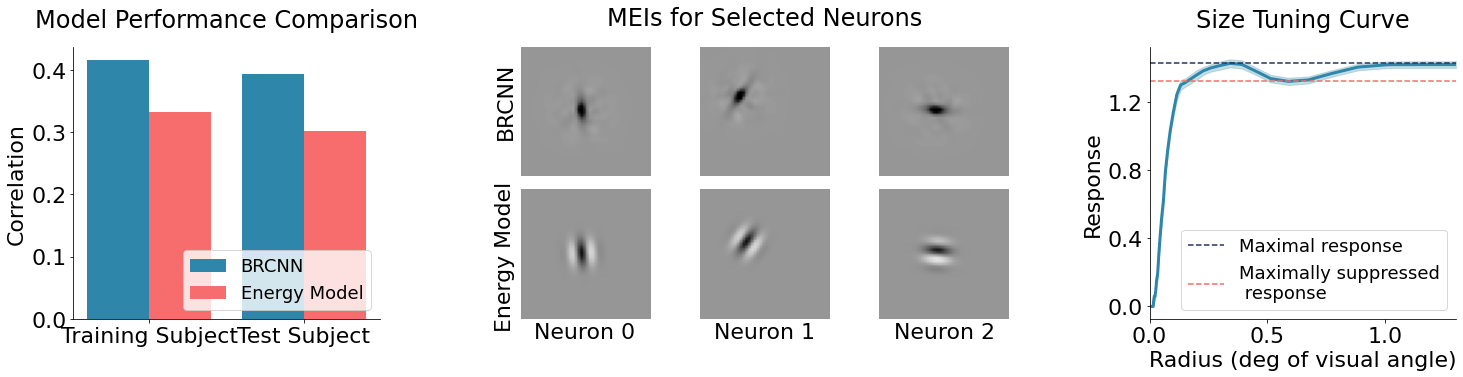

In [136]:
#### model performanc comparison plot
# Create a figure with 2 rows and 7 columns, with the first and last columns spanning both rows
fig = plt.figure(figsize=(24, 5))  # Increased figure size

# Create a grid layout with wider left column and more space for labels
gs = plt.GridSpec(2, 7, figure=fig, width_ratios=[2, 0.5, 1, 1, 1, 0.5, 2], left=0.1, right=0.9, 
                 wspace=0.15, hspace=0.1)  # Reduced spacing between MEIs

# Create the left plot spanning both rows
ax_left = fig.add_subplot(gs[:, 0])  # Spans both rows in first column
width = 0.4
x = np.arange(2)

ax_left.bar(x - width/2, [corr_0_brcnn, corr_1_brcnn], width, label='BRCNN', color='#2E86AB')
ax_left.bar(x + width/2, [corr_0_energy, corr_1_energy], width, label='Energy Model', color='#F76C6C')

ax_left.set_xticks(x)
ax_left.set_xticklabels(['Training\nsubject', 'Test\nsubject'], fontsize=22)
ax_left.set_ylabel('Correlation', fontsize=22)
ax_left.legend(fontsize=18, loc='lower right')
ax_left.set_title('Model Performance Comparison', fontsize=24, pad=20)
ax_left.tick_params(axis='both', which='major', labelsize=22)

# Remove top and right spines
ax_left.spines['top'].set_visible(False)
ax_left.spines['right'].set_visible(False)

# Reduce number of y-axis ticks
ax_left.yaxis.set_major_locator(plt.MaxNLocator(5))

# Add column titles for MEIs with adjusted position and larger font
plt.figtext(0.5, 0.94, 'MEIs for Selected Neurons', fontsize=24, ha='center')
for i in range(3):
    plt.figtext(0.396 + i*0.104,  0.07, f'Neuron {i}', fontsize=22, ha='center')  # Adjusted position

# Create empty subplot after left plot
ax_empty1 = fig.add_subplot(gs[:, 1])
ax_empty1.axis('off')

# Create the MEI plots in the middle 3 columns
for i in range(3):
    # Bottom row MEIs (Energy model)
    ax = fig.add_subplot(gs[1, i+2])
    if i == 0:  # Add row title for Energy model
        plt.figtext(0.35, 0.30, 'Energy Model', fontsize=22, rotation=90, va='center', ha='center')
    ax.imshow(meis_energy[i], cmap='Greys_r', vmin=-v_half, vmax=v_half)
    ax.axis('off')
    
    # Top row MEIs (BRCNN)
    ax = fig.add_subplot(gs[0, i+2])
    if i == 0:  # Add row title for BRCNN
        plt.figtext(0.35, 0.73, 'BRCNN', fontsize=22, rotation=90, va='center', ha='center')
    ax.imshow(brcnn_meis[i], cmap='Greys_r', vmin=-1.7876, vmax=2.1919)
    ax.axis('off')

# Create empty subplot before right plot
ax_empty2 = fig.add_subplot(gs[:, 5])
ax_empty2.axis('off')

# Create the right plot spanning both rows for size tuning curve
ax_right = fig.add_subplot(gs[:, -1])  # Spans both rows in last column
ax_right.set_title('Size Tuning Curve', fontsize=24, pad=20)

# Plot size tuning curve
sns.lineplot(x=radii, y=size_tuning_mean, color='#2E86AB', ax=ax_right, linewidth=3)  # Rich blue for main line, increased width
ax_right.fill_between(radii, size_tuning_mean-size_tuning_sem, size_tuning_mean+size_tuning_sem, 
                     alpha=0.4, color='#6FACC0')  # Darker blue for shading

# Add horizontal lines for max and min after max
max_val = np.max(size_tuning_mean)
max_idx = np.argmax(size_tuning_mean)
min_after_max = np.min(size_tuning_mean[max_idx:])

ax_right.hlines(y=max_val, xmin=0, xmax=1.3, color='#24305E', 
               linestyle='--', label='Maximal response')  # Dark max
ax_right.hlines(y=min_after_max, xmin=0, xmax=1.3, color='#F76C6C', 
               linestyle='--', label='Maximally suppressed\n response')  # Coral red

ax_right.set_xlabel('Radius (deg of visual angle)', fontsize=22)
ax_right.set_ylabel('Response', fontsize=22)
ax_right.tick_params(axis='both', which='major', labelsize=22)
ax_right.set_xlim(0, 1.3)
ax_right.legend(fontsize=18,  loc='lower right')

# Remove top and right spines
ax_right.spines['top'].set_visible(False)
ax_right.spines['right'].set_visible(False)

# Reduce number of y-axis ticks for size tuning plot
ax_right.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.savefig('figure2.svg', format='svg', bbox_inches='tight')
plt.show()


In [ ]:

print(get_avg_correlations(energy_model, dataloaders0['test'], as_dict=False, per_neuron=False))

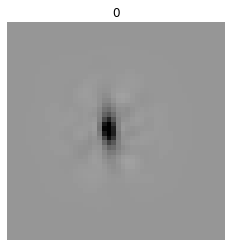

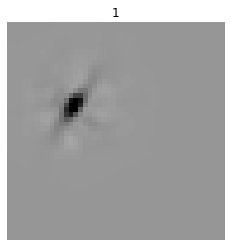

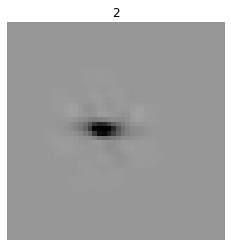

In [15]:
meis = np.load('/project/monkey_training/meis.npy')
for i in range(3):
    plt.imshow(meis[i], cmap='Greys_r', vmin = -1.7876, vmax = 2.1919)
    plt.axis('off')
    plt.title(i)
    plt.show()
